In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('../../US_Accidents_May19_Migrated Data.csv')

In [3]:
df.head()


Airport_Code  Amenity Astronomical_Twilight   Bump Calculation1  \
0          NaN    False                   Day  False    Remaining   
1         KDWH    False                   Day  False    Remaining   
2         KDSM    False                   Day  False    Remaining   
3         KCPS    False                   Day  False    Remaining   
4         KXBP    False                   Day  False    Remaining   

              City Civil_Twilight  count of Bump  Count of Crossing  \
0    Garnet Valley            Day              0                  0   
1           Spring            Day              0                  0   
2  West des Moines            Day              0                  0   
3      Saint Louis            Day              0                  0   
4       Springtown            Day              0                  0   

   count Traffic Signal  ... Humidity(%) Number of Records  Precipitation(in)  \
0                     0  ...         NaN                 1                NaN   
1                     0  ...        82.0                 1                NaN   
2                     0  ...        79.0                 1                NaN   
3                     0  ...        84.0                 1                NaN   
4                     0  ...        96.0                 1                NaN   

  Pressure(in)  Records  Start_Lat  Start_Lng    TMC Wind_Chill(F)  \
0          NaN        1  39.852940 -75.461739  201.0           NaN   
1        30.02        1  30.159246 -95.510826  201.0           NaN   
2        30.04        1  41.586887 -93.806496  201.0          34.3   
3        30.10        1  38.634579 -90.186806  201.0           NaN   
4        29.95        1  32.930958 -97.641068  201.0           NaN   

   Wind_Speed(mph)  
0              NaN  
1              5.8  
2             11.5  
3             12.7  
4              5.8  

[5 rows x 57 columns]

In [4]:
NY = df['City'] == 'New York'
NY_df = df[NY]
NY_loca_df = NY_df[['Start_Lat','Start_Lng']]
NY_loca_df.columns = ["latitude", "longitude"]
coords = NY_loca_df[["latitude", "longitude"]]
X = NY_loca_df.to_numpy()


In [5]:
coords

latitude  longitude
4002     40.785564 -73.984062
4003     40.850067 -73.944817
4237     40.708187 -73.999374
4324     40.804005 -73.927925
4333     40.759762 -73.960991
...            ...        ...
2242737  40.735397 -73.974899
2242820  40.735397 -73.974899
2242860  40.735397 -73.974899
2242893  40.743195 -73.972115
2242894  40.750038 -74.008354

[5420 rows x 2 columns]

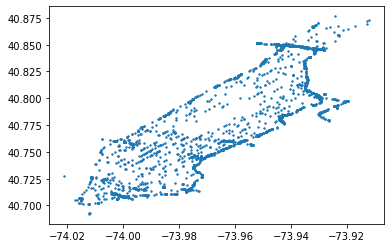

In [6]:
plt.scatter( NY_loca_df["longitude"],NY_loca_df["latitude"],s=2)

(5100.0, 5570.0)

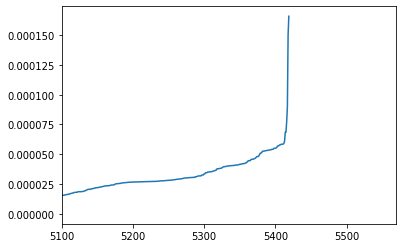

In [7]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(np.radians(X))
distances, indices = nbrs.kneighbors(np.radians(X))
distances = distances[:, 1]
distances = np.sort(distances, axis=0)
fig=plt.figure()
plt.plot(distances)
plt.xlim(5100, 5570)

In [8]:
dbscan_cluster_model = DBSCAN(eps=0.00006, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(X))
dbscan_cluster_model
dbscan_cluster_model.labels_

array([0, 1, 2, ..., 2, 2, 2])

In [10]:
NY_loca_df['cluster'] = dbscan_cluster_model.labels_

NY_loca_df

/var/folders/q8/xbm3md952l9cy0kxj3h2dx180000gn/T/ipykernel_9599/2461552297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_loca_df['cluster'] = dbscan_cluster_model.labels_


latitude  longitude  cluster
4002     40.785564 -73.984062        0
4003     40.850067 -73.944817        1
4237     40.708187 -73.999374        2
4324     40.804005 -73.927925        1
4333     40.759762 -73.960991        2
...            ...        ...      ...
2242737  40.735397 -73.974899        2
2242820  40.735397 -73.974899        2
2242860  40.735397 -73.974899        2
2242893  40.743195 -73.972115        2
2242894  40.750038 -74.008354        2

[5420 rows x 3 columns]

In [14]:
location = NY_loca_df['latitude'].mean(), NY_loca_df['longitude'].mean()

m = folium.Map(location=location,zoom_start=11,control_scale = True)

folium.TileLayer('cartodbpositron').add_to(m)

clust_colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

for i in range(0,len(NY_loca_df)):
    colouridx = NY_loca_df['cluster'].iloc[i]
    if colouridx == -1:
        pass
    else:
        col = clust_colours[colouridx%len(clust_colours)]
        folium.CircleMarker([NY_loca_df['latitude'].iloc[i],NY_loca_df['longitude'].iloc[i]], radius = 10, color = col, fill = col).add_to(m)

m

In [15]:
ss(X, NY_loca_df['cluster'])

-0.2804246143835253

In [16]:
epsilons = np.linspace(0.00006,0.00007, num=2)
epsilons

array([6.e-05, 7.e-05])

In [37]:
min_samples = np.arange(4, 80 , step=3) 
min_samples

array([ 4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
       55, 58, 61, 64, 67, 70, 73, 76, 79])

In [38]:
combinations = list(itertools.product(epsilons, min_samples))
combinations

[(6e-05, 4),
 (6e-05, 7),
 (6e-05, 10),
 (6e-05, 13),
 (6e-05, 16),
 (6e-05, 19),
 (6e-05, 22),
 (6e-05, 25),
 (6e-05, 28),
 (6e-05, 31),
 (6e-05, 34),
 (6e-05, 37),
 (6e-05, 40),
 (6e-05, 43),
 (6e-05, 46),
 (6e-05, 49),
 (6e-05, 52),
 (6e-05, 55),
 (6e-05, 58),
 (6e-05, 61),
 (6e-05, 64),
 (6e-05, 67),
 (6e-05, 70),
 (6e-05, 73),
 (6e-05, 76),
 (6e-05, 79),
 (7e-05, 4),
 (7e-05, 7),
 (7e-05, 10),
 (7e-05, 13),
 (7e-05, 16),
 (7e-05, 19),
 (7e-05, 22),
 (7e-05, 25),
 (7e-05, 28),
 (7e-05, 31),
 (7e-05, 34),
 (7e-05, 37),
 (7e-05, 40),
 (7e-05, 43),
 (7e-05, 46),
 (7e-05, 49),
 (7e-05, 52),
 (7e-05, 55),
 (7e-05, 58),
 (7e-05, 61),
 (7e-05, 64),
 (7e-05, 67),
 (7e-05, 70),
 (7e-05, 73),
 (7e-05, 76),
 (7e-05, 79)]

In [39]:
N = len(combinations)
N

52

In [40]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []
  

  for i, (eps, num_samples) in enumerate(combinations):
    
    dbscan_cluster_model = DBSCAN(eps= eps, min_samples= num_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(X))
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Index: 0, Score: -0.48243294894899685, Labels: [0 1 1 ... 1 1 1], NumClusters: 7
Index: 1, Score: -0.3627210378448554, Labels: [0 1 2 ... 2 2 2], NumClusters: 14
Index: 2, Score: 0.07359171043865441, Labels: [ 0  1  2 ...  2  2 -1], NumClusters: 11
Index: 3, Score: 0.1900252610059864, Labels: [ 0  1  2 ...  2  2 -1], NumClusters: 13
Index: 4, Score: 0.27303071991365785, Labels: [ 0  1  2 ...  2  2 -1], NumClusters: 13
Index: 5, Score: 0.2321347985267425, Labels: [ 0  1  2 ...  2  2 -1], NumClusters: 15
Index: 6, Score: 0.23485952285632844, Labels: [ 0  1  2 ...  2  2 -1], NumClusters: 13
Index: 7, Score: 0.35406185931955847, Labels: [ 0  1  2 ...  4  4 -1], NumClusters: 14
Index: 8, Score: 0.3739257726402186, Labels: [ 0  1  2 ...  4  4 -1], NumClusters: 13
Index: 9, Score: 0.42114227593921916, Labels: [ 0  1  2 ...  4  4 -1], NumClusters: 13
Index: 10, Score: 0.4128393290653639, Labels: [ 0  1  2 ...  4  4 -1], NumClusters: 14
Index: 11, Score: 0.40920666885812623, Labels: [ 0  1  2 .

In [41]:
best_dict

{'best_epsilon': 7e-05,
 'best_min_samples': 76,
 'best_labels': array([-1,  0,  1, ...,  6,  6, -1]),
 'best_score': 0.44225565474800377}

In [44]:
NY_loca_df['cluster'] = best_dict['best_labels']

/var/folders/q8/xbm3md952l9cy0kxj3h2dx180000gn/T/ipykernel_9599/1727870116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_loca_df['cluster'] = best_dict['best_labels']


In [45]:
location = NY_loca_df['latitude'].mean(), NY_loca_df['longitude'].mean()

m = folium.Map(location=location,zoom_start=11,control_scale = True)

folium.TileLayer('cartodbpositron').add_to(m)

clust_colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

for i in range(0,len(NY_loca_df)):
    colouridx = NY_loca_df['cluster'].iloc[i]
    if colouridx == -1:
        pass
    else:
        col = clust_colours[colouridx%len(clust_colours)]
        folium.CircleMarker([NY_loca_df['latitude'].iloc[i],NY_loca_df['longitude'].iloc[i]], radius = 10, color = col, fill = col).add_to(m)

m